In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [3]:
url='https://www.amazon.in/MagicBook-i5-12450H-Anti-Glare-Full-Size-Keyboard/dp/B0CRQB4HBP/ref=sr_1_27?dib=eyJ2IjoiMSJ9.1yIdZ51EOvLHIkLpVg4mK11uGODGpS7S1B4o6vSw55gD6yZUSSNP0nAFGVNWASjLT88V0jJDUi2t3m591VwCN6qd5ujq13MzwDy6q29OuYl48R9T3KpJenPxvdM0XkVSLpLyJxwrDEnHy9Frrv_XYJ_ww528KiMNMieZrJHNbW_2rc1JZ6af4d6K7b0SL-vl.NV48RewtkuEqU2dKmapANs0X7mZaATVy80spWJxk8jE&dib_tag=se&keywords=laptops&qid=1712660429&sr=8-27'

In [4]:
webpage=requests.get(url=url, headers=headers).text

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- s
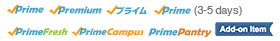
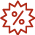

In [6]:
webpage

In [5]:
soup=BeautifulSoup(webpage, 'lxml')

In [9]:
Title=soup.find('span', class_="a-size-large product-title-word-break").text.strip()
Title

'HONOR MagicBook X16 (2024), 12th Gen Intel Core i5-12450H, 16-inch (40.64 cm) FHD IPS Anti-Glare Thin and Light Laptop (16GB/512GB PCIe SSD/Windows 11/ Full-Size Numeric Keyboard /1.68Kg), Gray'

In [14]:
soup.find('div', class_="a-section table-padding").find_all('tr')[0].find('td').text.strip()

'B0CRQB4HBP'

In [9]:
additional_information_headers=[]
additional_information_values=[]
for i in soup.find('div', class_="a-section table-padding").find_all('tr'):
    additional_information_headers.append(i.find('th').text.strip())
    additional_information_values.append(i.find('td').text.strip())

In [10]:
additional_information_headers

['ASIN',
 'Customer Reviews',
 'Best Sellers Rank',
 'Date First Available',
 'Packer',
 'Importer',
 'Item Dimensions LxWxH',
 'Net Quantity',
 'Generic Name']

In [11]:
additional_information_values

['B0CRQB4HBP',
 '4.2 out of 5 stars    \n    312   \n\n\n 4.2 out of 5 stars',
 '#1,913 in Computers & Accessories (See Top 100 in Computers & Accessories)  #53 in Traditional Laptops',
 '10 January 2024',
 'Nanchang Huaqin Electronic Technology Co., Ltd. No. 2999, Tianxiang Avenue, High-Tech Development Zone, Nanchang City,Jiangxi Province, P.R. China',
 'P R Innovations Pvt. Ltd. 142/3, Transport Nagar, Agra, Uttar Pradesh - 282002, India Customer Care No. : 1800 309 8970 Email : customersupport@psavglobaltech.com Write to : Bozlun India Services, FF -10, Mark Mall, Sector 4B, Vasundhra, Ghaziabad - 201012',
 '6.4 x 32 x 51.9 Centimeters',
 '1 Count',
 'Laptop']

In [15]:
df_additional_information=pd.DataFrame(additional_information_values, additional_information_headers).T
df_additional_information

,ASIN,Customer Reviews,Best Sellers Rank,Date First Available,Packer,Importer,Item Dimensions LxWxH,Net Quantity,Generic Name
0,B0CRQB4HBP,4.2 out of 5 stars \n 312 \n\n\n 4.2 o...,"#1,913 in Computers & Accessories (See Top 100...",10 January 2024,"Nanchang Huaqin Electronic Technology Co., Ltd...","P R Innovations Pvt. Ltd. 142/3, Transport Nag...",6.4 x 32 x 51.9 Centimeters,1 Count,Laptop


In [26]:
df_additional_information.shape

(1, 9)

In [16]:
techincal_details_headers=[]
technical_details_values=[]
for i in soup.find('div', class_="a-expander-content a-expander-section-content a-section-expander-inner").find_all('tr'):
    techincal_details_headers.append(i.find('th').text.strip())
    technical_details_values.append(i.find('td').text.strip()[1:])

In [19]:
technical_details_values

['Honor',
 'HONOR, Nanchang Huaqin Electronic Technology Co., Ltd. No. 2999, Tianxiang Avenue, High-Tech Development Zone, Nanchang City, Jiangxi Province, P.R. China',
 'BRN-F56',
 'Space Gray',
 'Netbook',
 '51.9 Centimeters',
 '32 Centimeters',
 '16 Inches',
 '1920 x 1200 pixels',
 '1920 x 1200 MP',
 '6.4 x 32 x 51.9 cm; 1.68 kg',
 '1 Lithium Polymer batteries required. (included)',
 'Intel',
 'Core i5-12450H',
 '2 GHz',
 '8',
 '16',
 'LPDDR4X',
 'DDR4 SDRAM',
 '16 GB',
 'SSD',
 'PCIE x 4',
 '2 Immersive Surround Sound Speaker',
 'Intel UHD Graphics',
 'Intel',
 'Integrated',
 'DDR4 SDRAM',
 '2 GB',
 'Integrated',
 'Bluetooth, Wi-Fi',
 'Bluetooth, 802.11a/b/g/n/ac, 802.11ax',
 '2',
 '1',
 '65 Watts',
 'No',
 'Windows 11 Home',
 '9 Hours',
 'Yes',
 '3',
 '1U Laptop, 1 Unit 65W Type C Charger, 1 Unit Warranty Card, 1 Unit User Manual, 1 Unit Type C Data Cable',
 'HONOR',
 'China',
 '1 kg 680 g']

In [22]:
df_technical_details=pd.DataFrame(technical_details_values, techincal_details_headers).T
df_technical_details

,Brand,Manufacturer,Series,Colour,Form Factor,Item Height,Item Width,Standing screen display size,Screen Resolution,Resolution,...,Wattage,Optical Drive Type,Operating System,Average Battery Life (in hours),Are Batteries Included,Number of Lithium Ion Cells,Included Components,Manufacturer,Country of Origin,Item Weight
0,Honor,"HONOR, Nanchang Huaqin Electronic Technology C...",BRN-F56,Space Gray,Netbook,51.9 Centimeters,32 Centimeters,16 Inches,1920 x 1200 pixels,1920 x 1200 MP,...,65 Watts,No,Windows 11 Home,9 Hours,Yes,3,"1U Laptop, 1 Unit 65W Type C Charger, 1 Unit W...",HONOR,China,1 kg 680 g


In [44]:
customer_review_summary=soup.find_all('p', class_="a-spacing-small")[0].text.strip()
customer_review_summary


"Customers like the quality, performance, and display of the laptop. For example, they mention it's a great product, with a fast and powerful processor. They appreciate the stunning 16-inch Full HD display, which provides crisp visuals and vibrant colors. Customers are also happy with appearance. That said, opinions are mixed on the heating, battery life, and keyboard quality."

In [91]:
rating=soup.find_all('div', id="averageCustomerReviews")[0].find('a', href="javascript:void(0)").text.strip()[0:3]
rating

'4.2'

In [65]:
price=soup.find('span', class_="a-price aok-align-center reinventPricePriceToPayMargin priceToPay").text.strip()
price

'₹48,990'

In [25]:
combined_df=pd.concat([df_technical_details, df_additional_information], axis=1)
combined_df

,Brand,Manufacturer,Series,Colour,Form Factor,Item Height,Item Width,Standing screen display size,Screen Resolution,Resolution,...,Item Weight,ASIN,Customer Reviews,Best Sellers Rank,Date First Available,Packer,Importer,Item Dimensions LxWxH,Net Quantity,Generic Name
0,Honor,"HONOR, Nanchang Huaqin Electronic Technology C...",BRN-F56,Space Gray,Netbook,51.9 Centimeters,32 Centimeters,16 Inches,1920 x 1200 pixels,1920 x 1200 MP,...,1 kg 680 g,B0CRQB4HBP,4.2 out of 5 stars \n 312 \n\n\n 4.2 o...,"#1,913 in Computers & Accessories (See Top 100...",10 January 2024,"Nanchang Huaqin Electronic Technology Co., Ltd...","P R Innovations Pvt. Ltd. 142/3, Transport Nag...",6.4 x 32 x 51.9 Centimeters,1 Count,Laptop


In [92]:
combined_df['Title']=Title
combined_df['Customer_Review_Summary']=customer_review_summary
combined_df['Rating']=rating
combined_df['Price']=price

In [93]:
combined_df

,Brand,Manufacturer,Series,Colour,Form Factor,Item Height,Item Width,Standing screen display size,Screen Resolution,Resolution,...,Date First Available,Packer,Importer,Item Dimensions LxWxH,Net Quantity,Generic Name,Title,Customer_Review_Summary,Rating,Price
0,Honor,"HONOR, Nanchang Huaqin Electronic Technology C...",BRN-F56,Space Gray,Netbook,51.9 Centimeters,32 Centimeters,16 Inches,1920 x 1200 pixels,1920 x 1200 MP,...,10 January 2024,"Nanchang Huaqin Electronic Technology Co., Ltd...","P R Innovations Pvt. Ltd. 142/3, Transport Nag...",6.4 x 32 x 51.9 Centimeters,1 Count,Laptop,"HONOR MagicBook X16 (2024), 12th Gen Intel Cor...","Customers like the quality, performance, and d...",4.2,"₹48,990"
